<h2>Package import</h2>

In [23]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC

In [24]:
df = pd.read_excel('Dataset/DataSet_Long Method - Round 3.xlsx')

In [25]:
cleanup_nums = {"Final annotation":     {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 0: 0}}

df= df.replace(cleanup_nums)

In [26]:
df.set_index('Code Snippet ID')

,Link,Code Smell,Project Link,CYCLO,CYCLO_SWITCH,MLOC,MELOC,NOP,NOLV,NOTC,...,NOSL,NOMO,NOPE,NOLE,MMNB,NOUW,Final annotation,1,2,3
Code Snippet ID,,,,,,,,,,,,,,,,,,,,,
Aseprite.AsepriteFile.AsepriteFile(string),https://github.com/egordorichev/BurningKnight/...,Long Method,https://github.com/egordorichev/BurningKnight/...,5,5,37,27,1,20,0,...,0,19,4,0,4,0,1,2,2,2
"Aseprite.AsepriteFile.AsepriteFile(string, ContentBuildLogger)",https://github.com/egordorichev/BurningKnight/...,Long Method,https://github.com/egordorichev/BurningKnight/...,27,27,292,206,2,38,0,...,3,22,2,1,6,0,1,3,3,3
"Aseprite.AsepriteFile.ConvertBytesToPixels(byte[], Color[], Color[])",https://github.com/egordorichev/BurningKnight/...,Long Method,https://github.com/egordorichev/BurningKnight/...,8,8,25,21,3,5,0,...,0,21,4,0,3,16,1,1,2,2
"Aseprite.AsepriteImporter.Import(string, ContentImporterContext)",https://github.com/egordorichev/BurningKnight/...,Long Method,https://github.com/egordorichev/BurningKnight/...,1,1,3,1,2,0,0,...,0,0,0,0,0,5,0,0,0,0
"Aseprite.AsepriteProcessor.Process(Aseprite.AsepriteFile, ContentProcessorContext)",https://github.com/egordorichev/BurningKnight/...,Long Method,https://github.com/egordorichev/BurningKnight/...,1,1,6,4,2,0,0,...,0,0,0,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
osu.Game.Skinning.LegacySkin.GetSample(osu.Game.Audio.ISampleInfo),https://github.com/ppy/osu/tree/2cac373365309a...,Long Method,https://github.com/ppy/osu/tree/2cac373365309a...,4,4,21,14,1,2,0,...,0,0,0,0,1,18,0,/,0,0
osu.Game.Overlays.RankingsOverlay.LoadComplete(),https://github.com/ppy/osu/tree/2cac373365309a...,Long Method,https://github.com/ppy/osu/tree/2cac373365309a...,4,4,34,21,0,0,0,...,0,0,0,3,1,20,0,/,0,0
osu.Game.Skinning.LegacySkin.lookupForMania<TValue>(osu.Game.Skinning.LegacyManiaSkinConfigurationLookup),https://github.com/ppy/osu/tree/2cac373365309a...,Long Method,https://github.com/ppy/osu/tree/2cac373365309a...,41,7,133,93,1,0,0,...,9,7,0,0,0,74,1,/,1,1


In [27]:
df_train, df_test, y_train, y_test = train_test_split(df, df['Final annotation'],stratify=df['Final annotation'], test_size=0.20, random_state=0)

<h2>Data normalization</h2>

In [28]:
scaler = StandardScaler()

column_names = ['CYCLO','CYCLO_SWITCH','MLOC','MELOC','NOP','NOLV','NOTC','MNOL','MNOR','MNOC','MNOA','NONL','NOSL','NOMO','NOPE','NOLE','MMNB','NOUW']
features = df_train[column_names]


column_transformator = ColumnTransformer([('name', scaler, column_names)], remainder='passthrough')

scaled = column_transformator.fit(features)
X_train = scaled.transform(features)

test_features = df_test[column_names]

X_test= scaled.transform(test_features)

<h2>Random forest classifier</h2>

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=314,random_state=42)

rf_model = rf_classifier.fit(X_train,y_train)

In [30]:
y_pred = rf_model.predict(X_test)


print("Classification report: \n", metrics.classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       384
           1       0.91      0.83      0.87       131

    accuracy                           0.94       515
   macro avg       0.93      0.90      0.91       515
weighted avg       0.94      0.94      0.93       515



In [31]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(12,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    print(fi_df)

   feature_names  feature_importance
2           MLOC            0.159789
1   CYCLO_SWITCH            0.138119
3          MELOC            0.126312
5           NOLV            0.117104
17          NOUW            0.094679
0          CYCLO            0.076636
16          MMNB            0.054558
11          NONL            0.041408
9           MNOC            0.037471
13          NOMO            0.036003
10          MNOA            0.035449
7           MNOL            0.017824
4            NOP            0.017817
12          NOSL            0.013828
8           MNOR            0.011456
14          NOPE            0.011151
15          NOLE            0.008182
6           NOTC            0.002216


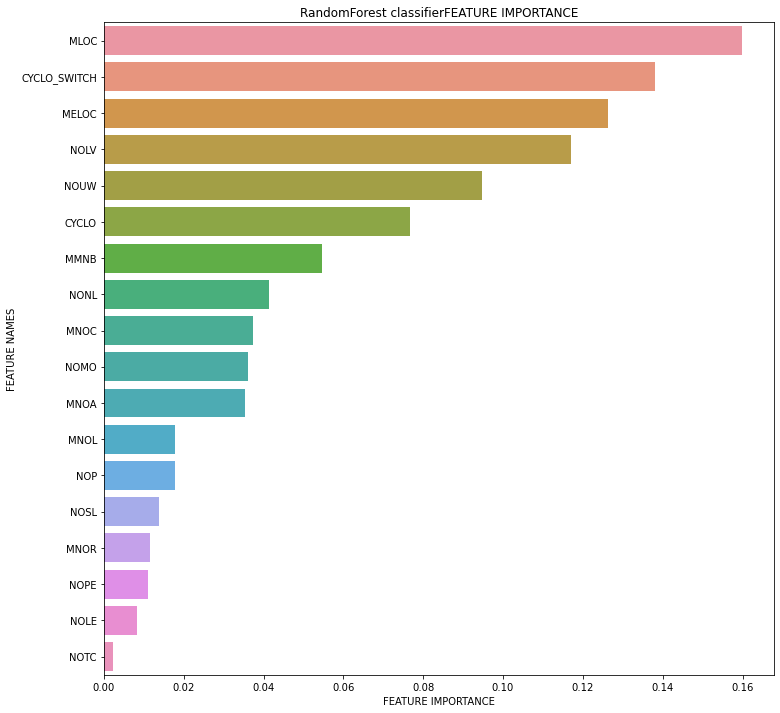

In [32]:
rf_feature_importance = rf.feature_importances_
plot_feature_importance(rf_feature_importance,column_names,'RandomForest classifier')

<h2>Catboost classifier</h2>

In [33]:
cat_model = CatBoostClassifier( iterations=100, learning_rate=0.1)

cat_model.fit( X_train, y_train, verbose=False )

y_predicted = cat_model.predict(X_test)

In [34]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       384
           1       0.92      0.83      0.88       131

    accuracy                           0.94       515
   macro avg       0.93      0.90      0.92       515
weighted avg       0.94      0.94      0.94       515



   feature_names  feature_importance
5           NOLV           17.125458
1   CYCLO_SWITCH           14.599677
17          NOUW           13.190396
3          MELOC            8.983952
16          MMNB            8.906491
13          NOMO            6.713770
2           MLOC            5.691381
10          MNOA            4.245625
11          NONL            4.158864
9           MNOC            4.133518
4            NOP            3.327446
0          CYCLO            3.124681
7           MNOL            1.970961
12          NOSL            1.721464
8           MNOR            0.804838
14          NOPE            0.609681
15          NOLE            0.547649
6           NOTC            0.144147


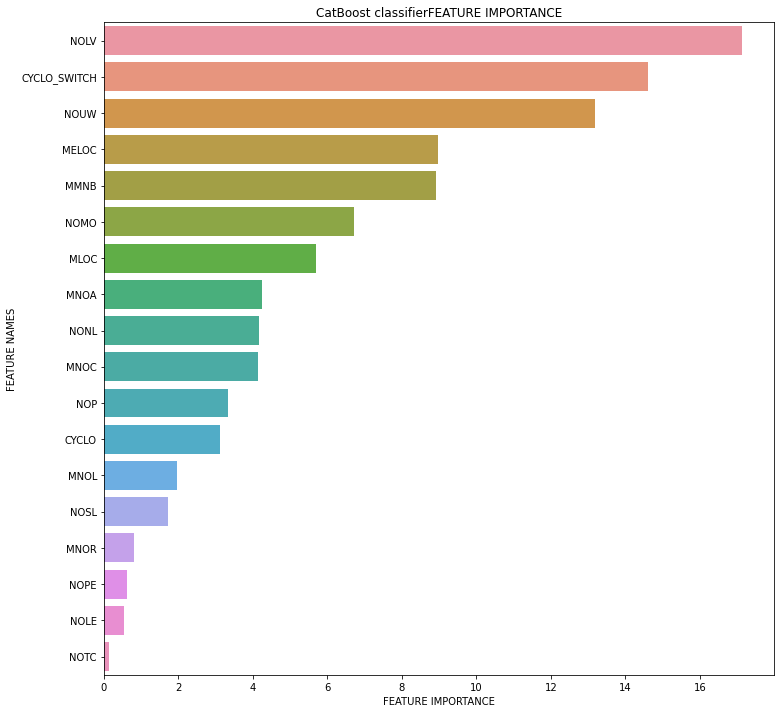

In [35]:
cat_feature_importance = cat_model.feature_importances_
plot_feature_importance(cat_feature_importance,column_names,'CatBoost classifier')

<h2>XGBoost classifier</h2>

In [36]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_test)

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       384
           1       0.89      0.83      0.86       131

    accuracy                           0.93       515
   macro avg       0.92      0.90      0.91       515
weighted avg       0.93      0.93      0.93       515



   feature_names  feature_importance
1   CYCLO_SWITCH            0.438332
3          MELOC            0.096843
5           NOLV            0.082845
16          MMNB            0.046452
17          NOUW            0.043996
2           MLOC            0.042680
13          NOMO            0.041469
11          NONL            0.030274
12          NOSL            0.021718
10          MNOA            0.021057
9           MNOC            0.020496
7           MNOL            0.019263
4            NOP            0.018633
0          CYCLO            0.017637
6           NOTC            0.016732
8           MNOR            0.015350
15          NOLE            0.015309
14          NOPE            0.010914


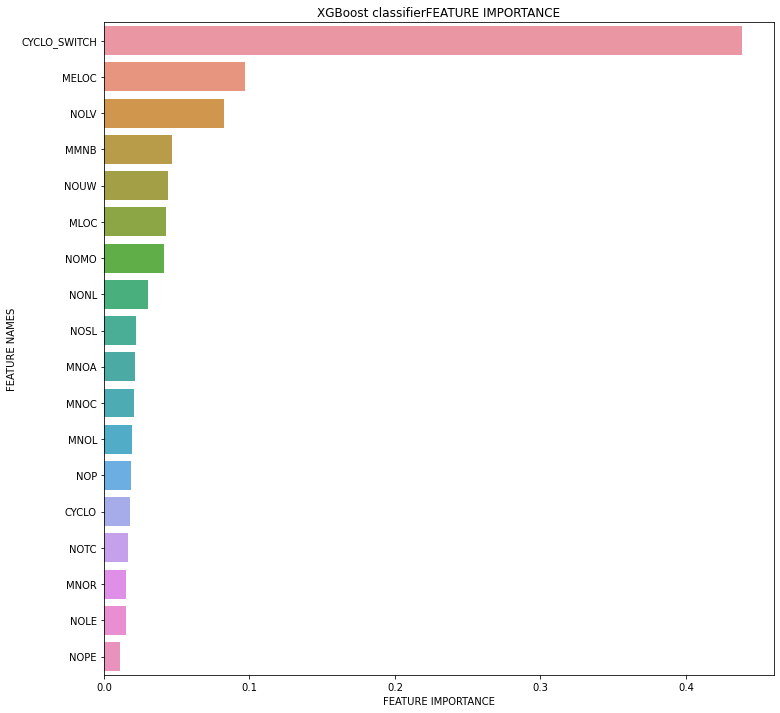

In [38]:
xgb_feature_importances = xgb_model.feature_importances_
plot_feature_importance(xgb_feature_importances,column_names,'XGBoost classifier')

<h2>Bagging classifier with linear svc as a base</h2>

In [39]:
svm = LinearSVC(random_state=42, max_iter = 2000)
bag_model = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

y_predicted = bag_model.predict(X_test)

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

In [40]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.91      0.80      0.85       131

    accuracy                           0.93       515
   macro avg       0.92      0.89      0.90       515
weighted avg       0.93      0.93      0.93       515

